In [199]:
from typing import *

import numpy as np
import matplotlib.pyplot as plt

In [221]:
# load mnist
with open("./t10k-images-idx3-ubyte", "rb") as f:
    # see http://yann.lecun.com/exdb/mnist/
    f.read(4)  # magic
    byteorder = "big"
    threshold = 100
    NUM_IMAGES = int.from_bytes(f.read(4), byteorder)
    NUM_ROWS = int.from_bytes(f.read(4), byteorder)
    NUM_COLS = int.from_bytes(f.read(4), byteorder)
    # Normalize to [-1, 1]
    raw_mnist = np.array(list(f.read())).reshape(NUM_IMAGES, NUM_ROWS, NUM_COLS)
    mnist = np.ones_like(raw_mnist)
    mnist[raw_mnist <= threshold] = -1

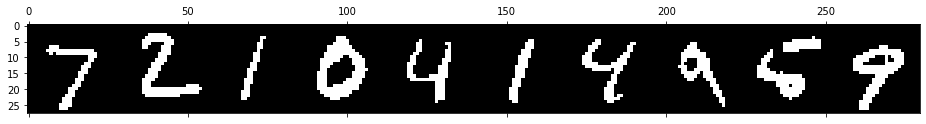

In [222]:
plt.matshow(np.concatenate(mnist[0:10], axis=1), cmap="bone")

In [209]:
def nbr(i, j) -> Sequence[Tuple[int, int]]:
    neighbours = []
    if i < 0 or i >= NUM_COLS or j < 0 or j >= NUM_COLS:
        raise ValueError("Input out of range.")
    if i != NUM_COLS - 1:
        neighbours.append((i + 1, j))
    if i != 0:
        neighbours.append((i - 1, j))
    if j != NUM_ROWS - 1:
        neighbours.append((i, j + 1))
    if j != 0:
        neighbours.append((i, j - 1))
    return neighbours

In [238]:
def get_E_0(x: np.ndarray, J=1) -> float:
    energy = 0
    for (i, j), val in np.ndenumerate(x):
        for neighbour in nbr(i,j):
            energy += J * val * x[neighbour]
    return energy

def get_prob_tilde_x(x: np.ndarray) -> np.float:
    return np.exp(get_E_0(x))

In [239]:
def get_L(y: np.ndarray, x:np.ndarray, sigma: float) -> np.ndarray:
    return (((x - y) / sigma) ** 2)

def get_L_minus(y: np.ndarray, sigma: float) -> np.ndarray:
    x = - np.ones_like(y)
    return get_L(y, x, sigma)

def get_L_plus(y: np.ndarray, sigma: float) -> np.ndarray:
    x = np.ones_like(y)
    return get_L(y, x, sigma)

In [240]:
def get_E(x: np.ndarray, y:np.ndarray, J: float, sigma: float) -> np.ndarray:
    return get_E_0(x, J) + get_L(x, y, sigma)

In [510]:
def get_m(mu: np.ndarray, J: float) -> np.ndarray:
    m = np.zeros_like(mu)
    for (i, j), val in np.ndenumerate(mu):
        for neighbour in nbr(i, j):
            m[i, j] += J * val
    return m

In [511]:
def get_a(mu: np.ndarray, y: np.ndarray, J: float, sigma: float) -> np.ndarray:
    return get_m(mu=mu, J=J) - 0.5 * (get_L_plus(y=y, sigma=sigma) - get_L_minus(y=y, sigma=sigma))

In [512]:
def get_mu(old_mu: np.ndarray, y: np.ndarray, J: float, sigma: float) -> np.ndarray:
    mu = get_a(mu=old_mu, y=y, J=J, sigma=sigma)
    return np.tanh(mu)

In [526]:
noisy_x = mnist[3] + np.random.normal(scale=0.5, size=x.shape)

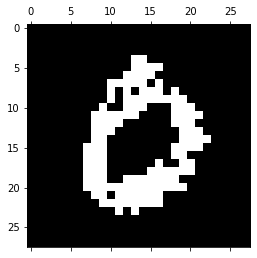

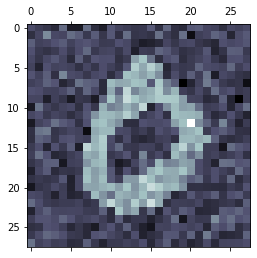

In [529]:
plt.matshow(noisy_x > 0.5, cmap="bone")
plt.matshow(noisy_x, cmap="bone")

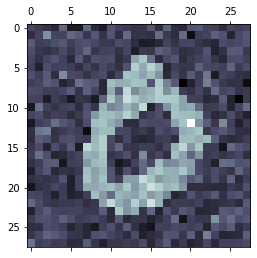

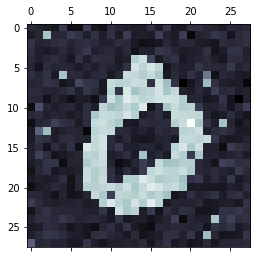

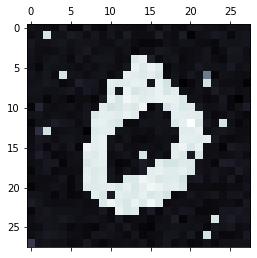

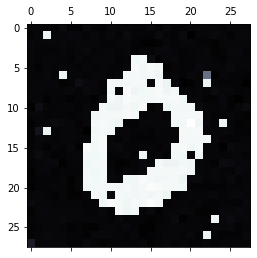

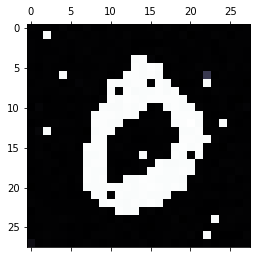

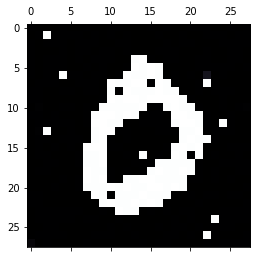

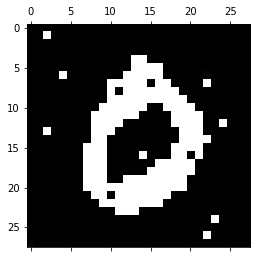

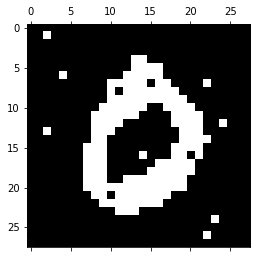

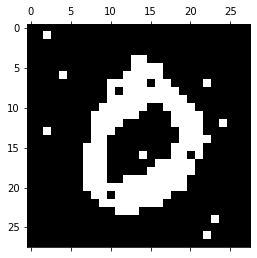

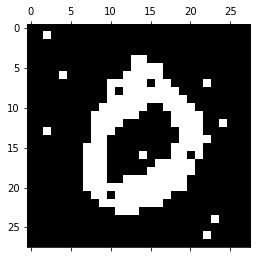

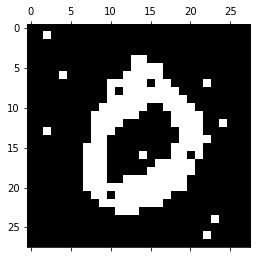

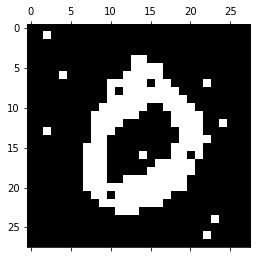

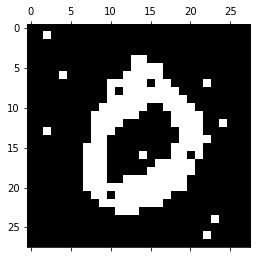

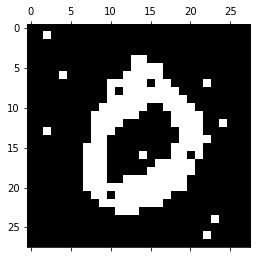

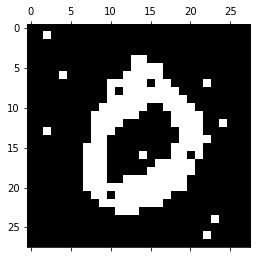

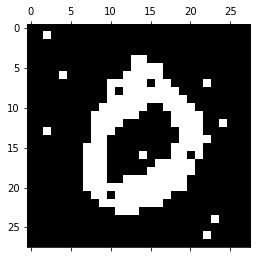

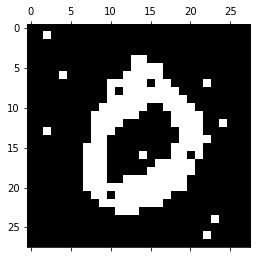

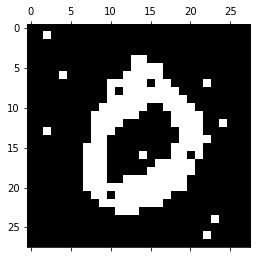

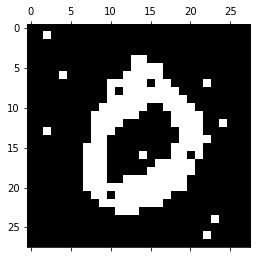

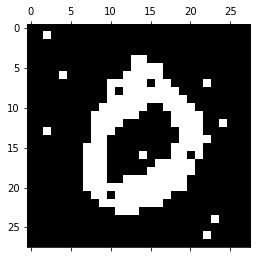

In [530]:
progress = noisy_x.copy()
mu = noisy_x.copy()
lmda = 0.1
for i in range(200):
    mu = (1 - lmda) * mu + lmda * get_mu(mu, noisy_x, 1, 0.7)
    progress = np.append(mu, progress, axis=0)
    if i%10 == 0:
        plt.matshow(mu, cmap="bone");

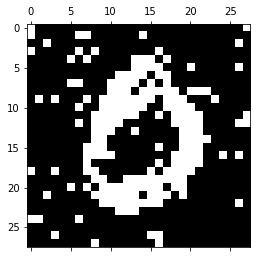

In [506]:
plt.matshow(mu, cmap="bone");